<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_14/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

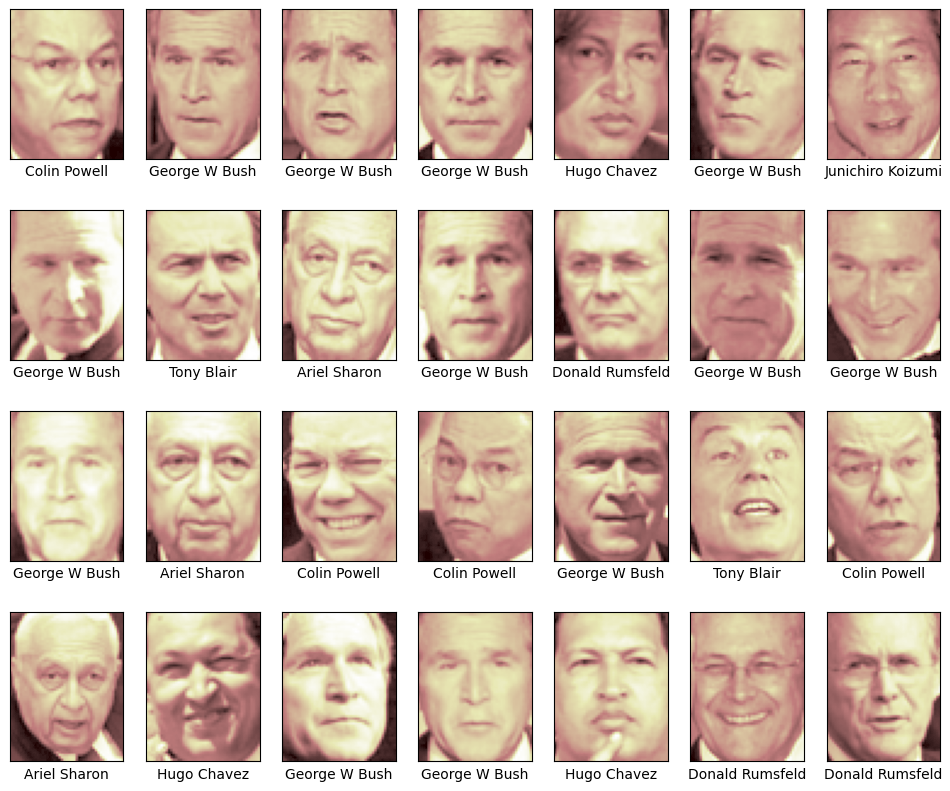

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people # this will download images if
faces = fetch_lfw_people(min_faces_per_person=60) # you don't already have them
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='pink')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

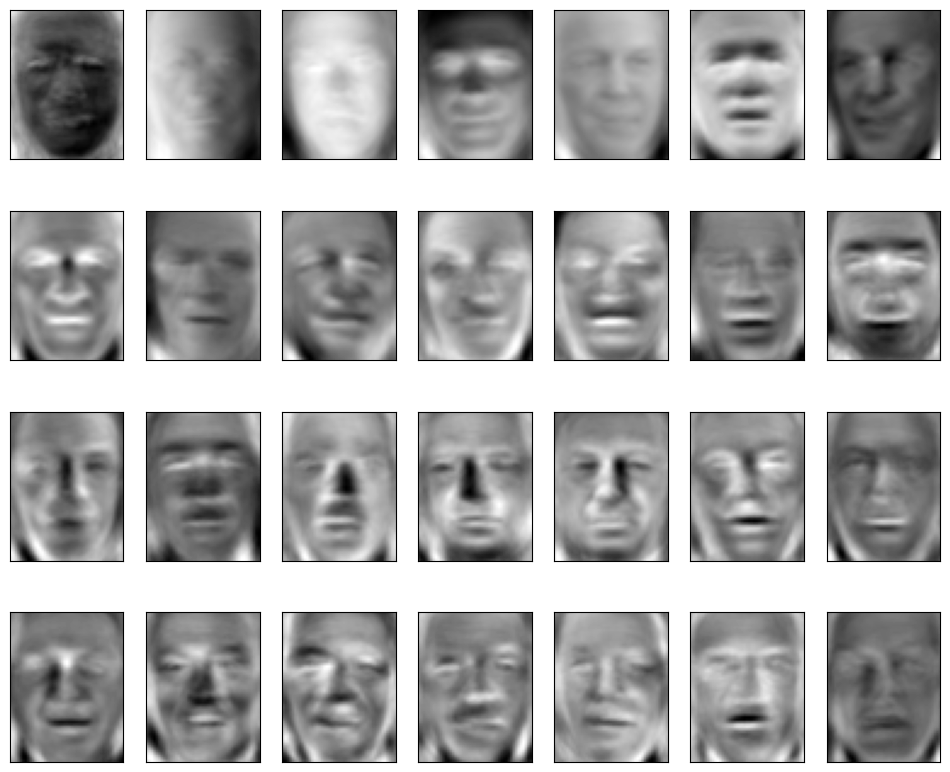

In [5]:
from sklearn.decomposition import PCA
# Extract the image data
P = faces.data

# Perform PCA to find eigenfaces
n_components = 28
pca = PCA(n_components=n_components)
pca.fit(P)
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='gray')
    axi.set(xticks=[], yticks=[])

plt.show()


In [7]:
# Perform PCA to find N
pca = PCA()
pca.fit(P)


PCA()

In [8]:
# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [9]:
N = np.argmax(cumulative_explained_variance >= 0.95) + 1

print("Number of dimensions to retain 95% variance:", N)


Number of dimensions to retain 95% variance: 184


In [10]:
# Use N to reduce the dimensionality of the dataset
pca = PCA(n_components=N)
P_reduced = pca.fit_transform(P)

# Compute the Frobenius norm of the error
error = np.linalg.norm(P - pca.inverse_transform(P_reduced), 'fro')

relative_error = error / np.linalg.norm(P, 'fro')

print("Relative error:", relative_error)


Relative error: 0.062523566


In [13]:
print("Value of N=",N)

Value of N= 184


In [15]:
N = 184

# Exclude the last seven images from the dataset
P_train = P[:-7]
P_test = P[-7:]

pca = PCA(n_components=N)
pca.fit(P_train)

PCA(n_components=184)

In [16]:
representations = pca.transform(P_test)
reconstructed_images = pca.inverse_transform(representations)

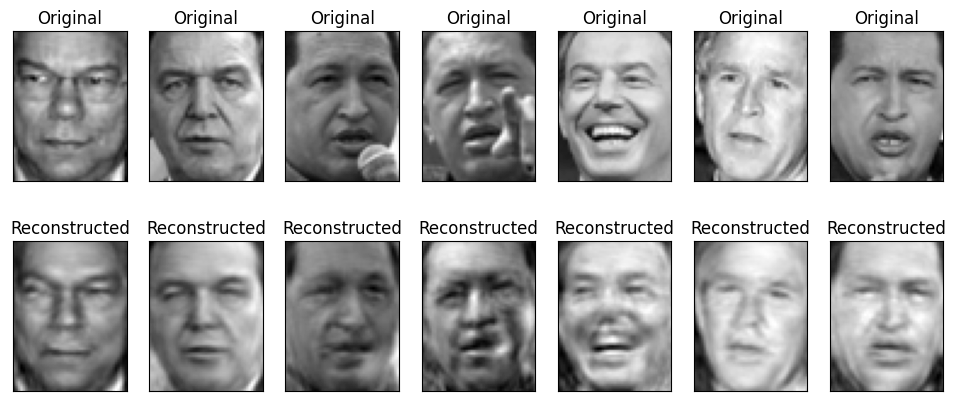

In [17]:
fig, axes = plt.subplots(2, 7, figsize=(12, 5))

for i in range(7):
    # Original image
    axes[0, i].imshow(P_test[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[0, i].set(xticks=[], yticks=[])
    axes[0, i].set_title('Original')

    # Reconstructed image using eigenfaces
    axes[1, i].imshow(reconstructed_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[1, i].set(xticks=[], yticks=[])
    axes[1, i].set_title('Reconstructed')

plt.show()

In [18]:
# Perform PCA and exclude the first four principal components (axes 0, 1, 2, and 3)
n_components = 7  # Number of total principal components
pca = PCA(n_components=n_components)
pca.fit(P)


PCA(n_components=7)

In [32]:
selected_indices = np.where((faces.target == faces.target_names.tolist().index('Ariel Sharon')) |
                            (faces.target == faces.target_names.tolist().index('Hugo Chavez')))

selected_data = faces.data[selected_indices]
selected_targets = faces.target[selected_indices]

In [33]:
# Perform PCA with 3 components (axes 4, 5, and 6)
pca_task4 = PCA(n_components=3, svd_solver='full')
pca_task4.fit(selected_data)

# Transform the data to the 3D space
transformed_data = pca_task4.transform(selected_data)


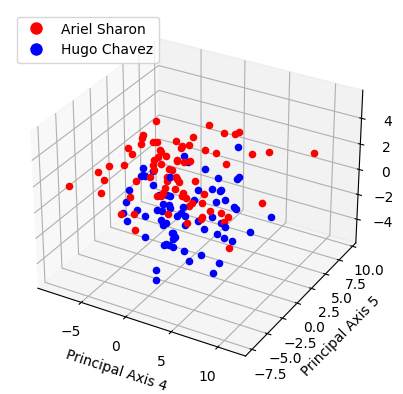

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(selected_targets)):
    if selected_targets[i] == faces.target_names.tolist().index('Ariel Sharon'):
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='r', label='Ariel Sharon')
    else:
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='b', label='Hugo Chavez')

ax.set_xlabel("Principal Axis 4")
ax.set_ylabel("Principal Axis 5")
ax.set_zlabel("Principal Axis 6")

legend1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Ariel Sharon')
legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Hugo Chavez')

ax.legend(handles=[legend1, legend2], loc='upper left')

plt.show()
